# "[Crawling] 교보문고 순회 크롤러"
> "순회 크롤러 "

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Selenium, BeautifulSoup, 교보문고 순회크롤러, codecs]
- author: 도형준

In [1]:
# 크롤링 작업을 위한 라이브러리 import
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
# 코드 진행 지연을 위한 time import
import time
# 2022년도 7월 이후 selenium 업데이트로 인한 xpath 추적시 import
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

import codecs

## 순회 크롤러

- 같은 양식의 페이지를 순회하면서 자료를 수집해오는 크롤러
- 원 페이지 크롤러를 제작한 다음, 완성된 크롤러를 반복문에 넣어서 만든다
- 반복을 어디부터 돌리지에 대한 파악이 제일 중요하다

- 목적: 순위가 1000번째까지의 책의 제목, 저자, 가격 정보를 txt로 가져온다.

- 코드를 수정하고 싶은 경우
    - 자신의 chromedriver저장 경로로 바꿔준다.
    - 자신의 txt파일 저장 경로를 바꿔준다.
    - 자신의 csv파일 저장 경로를 바꿔준다.

In [2]:
driver = webdriver.Chrome("C:/Users/dhj98/chromedriver.exe")
time.sleep(1)

driver.get("https://product.kyobobook.co.kr/bestseller/online?period=001")
time.sleep(5)

kyobo_author_list=[]
kyobo_title_list=[]
kyobo_price_list=[]

for page in range(50): # 최대 50페이지
    source = driver.page_source
    parsed_source = BeautifulSoup(source, "html.parser")
    
    span_title_list=parsed_source.find_all("span",class_='prod_name')
    span_author_list=parsed_source.find_all("span",class_='prod_author')
    span_price_list=parsed_source.find_all("span",class_='val')
    
    
    # 페이지별 저자, 제목, 가격 각 리스트에 추가하기
    for i,j,k in zip(span_author_list,span_title_list,span_price_list):
        kyobo_author_list.append(i.text.split('·')[0])
        kyobo_title_list.append(j.text)
        kyobo_price_list.append(k.text)
    
    # 책 순위정보 가져오기
    span_book_num = parsed_source.find_all("span",class_='text')[-14].text
    
    # 책이 1000번째 순위인지 아닌지에 따라 다음 페이지 넘어가는 경우 결정
    if span_book_num == ' 1000': # 책 순위가 1000번째일 경우, driver 종료
        driver.close()
        break
    else: # 책 순위가 1000번째가 아닌 경우, 다음 페이지로
        driver.find_element(By.XPATH,'//*[@id="tabRoot"]/div[2]/div[1]/button[2]').click()
        time.sleep(5)

# txt 파일로 정리하기
f = codecs.open("C:/Users/dhj98/playdata/crawler/교보순회_result.txt", mode="w")
f.write("%s,%s,%s,%s\n"%('순위','제목','저자','가격'))
for i in range(len(kyobo_price_list)):
    f.write("%s 순위, %s,%s,%s\n" % ((i+1),
                                                   kyobo_title_list[i].replace(',', ''),
                                                   kyobo_author_list[i].replace(',', ''),
                                                   kyobo_price_list[i].replace(',', '')))
f.close()

# txt to csv
import pandas as pd

df = pd.read_csv("C:/Users/dhj98/playdata/crawler/교보순회_result.txt",encoding='cp949')
new_csv_file = df.to_csv("C:/Users/dhj98/playdata/crawler/교보순회_result.csv",encoding='cp949')

C:\Users\dhj98\AppData\Local\Temp\ipykernel_8356\3993268019.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/dhj98/chromedriver.exe")


In [3]:
len(kyobo_price_list)

902

- 값이 1000이 되지 않는 이유는 1000위까지의 모든 순위의 책이 있는 것이 아님
- 예를 들어, 25위 다음에 26위를 뛰어넘고 27위로 가는 케이스 존재
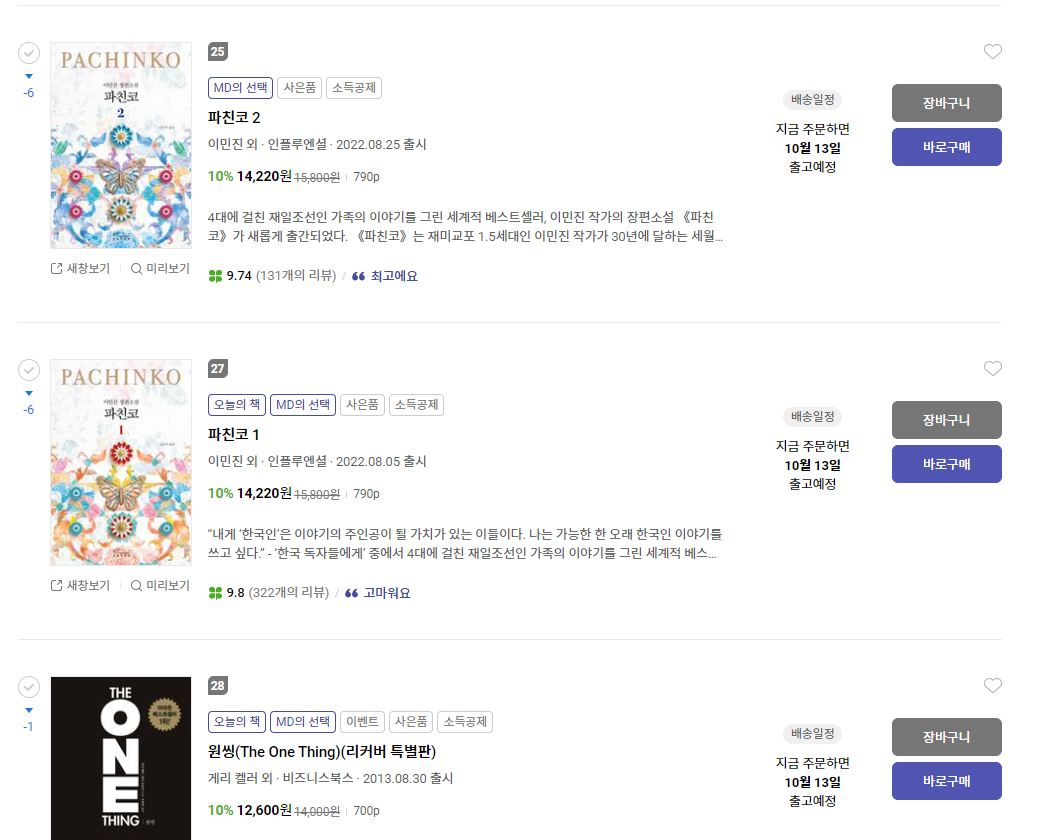

## 순위

- 순위의 경우, ("span",class_='text')에 담겨있습니다.
- 하지만 순위 뿐만 아니라 다른 정보들도 함께 포함되어 있습니다.
- 이에 따라, 순위만 따로 추출하는 전처리 과정이 필요합니다

In [5]:
span_rank_list=parsed_source.find_all("span",class_='text')
span_rank_list

[<span class="text">브랜드 더보기</span>,
 <span class="text">회원혜택</span>,
 <span class="text">상세검색</span>,
 <span class="text">도움말</span>,
 <span class="text">국내도서 전체</span>,
 <span class="text">서양도서 전체</span>,
 <span class="text">일본도서 전체</span>,
 <span class="text">교보Only 전체</span>,
 <span class="text">주요서비스</span>,
 <span class="text">이벤트 / 혜택</span>,
 <span class="text">브랜드캠페인</span>,
 <span class="text">문화공간</span>,
 <span class="text">eBook/sam</span>,
 <span class="text">웹소설 톡소다</span>,
 <span class="text">핫트랙스</span>,
 <span class="text">중고장터</span>,
 <span class="text">CASTing</span>,
 <span class="text">북모닝</span>,
 <span class="text">스토리</span>,
 <span class="text">회원혜택</span>,
 <span class="text">고객센터</span>,
 <span class="text">마이</span>,
 <span class="text">라이브러리</span>,
 <span class="text">매장안내</span>,
 <span class="text">회사소개</span>,
 <span class="text">협력사여러분</span>,
 <span class="text">집계기준</span>,
 <span class="text">전체</span>,
 <span class="text">전체</span>,
 <span class="

- 아직 해결 시도중

## 결과

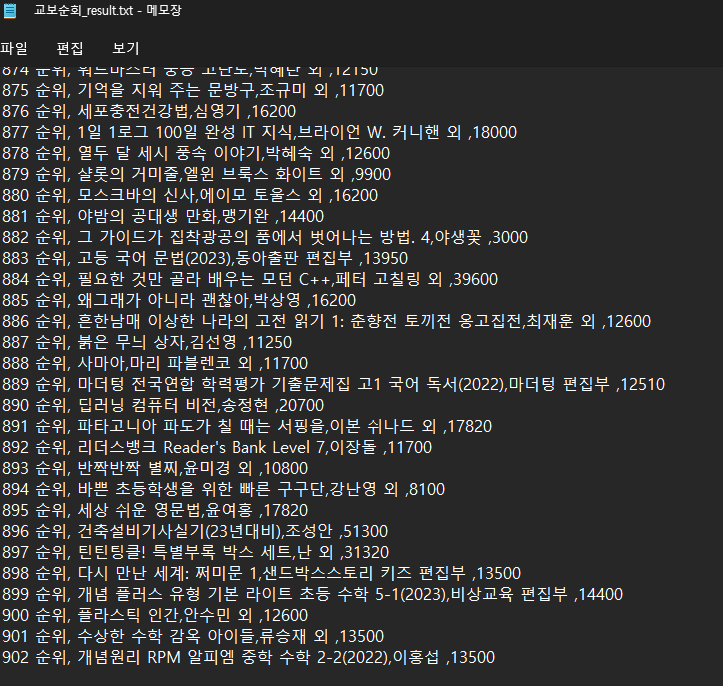